In [1]:
%matplotlib inline
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

C:\Users\Cadrev\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# Open images and convert to RGB and Gray scale
img     = cv2.imread('extract_sample.png')
gray    = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
colored = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

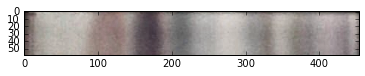

In [3]:
# Get the shape of the data
height = img.shape[0]
width  = img.shape[1]

# Display the RGB image
plt.imshow(colored)
plt.show()

In [4]:
# Get the color line plot for each channel
results = []

for w in range(width):
    
    # Get the pixel information per vertical line slice of the image
    line_bgr  = [img[h,w,:] for h in range(height)]
    line_gray = [gray[h,w]  for h in range(height) ]
    
    image_t   = np.array(line_bgr).T
    
    # Get the mean color for the vertical line profile of the image
    gray_mean = np.mean(line_gray)
    b_mean    = image_t[0].mean()
    g_mean    = image_t[1].mean()
    r_mean    = image_t[2].mean()
    
    # Append the results to a list of dictionary
    results.append({'pixel':w, 'blue':b_mean, 'green':g_mean, 'red':r_mean, 'gray':gray_mean})

In [5]:
# Convert the dictinary to a Dataframe for
# easy/convenient manipulation and plotting of the data
df = pd.DataFrame(results)
df.set_index(['pixel'])
df[['pixel','red','green','blue','gray']].head(5)


,pixel,red,green,blue,gray
0,0,55.983051,47.949153,44.762712,50.016949
1,1,70.338983,60.694915,57.983051,63.288136
2,2,79.525424,69.169492,66.491525,71.966102
3,3,87.101695,75.152542,72.932203,78.491525
4,4,93.169492,80.813559,78.694915,84.288136


C:\Users\Cadrev\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


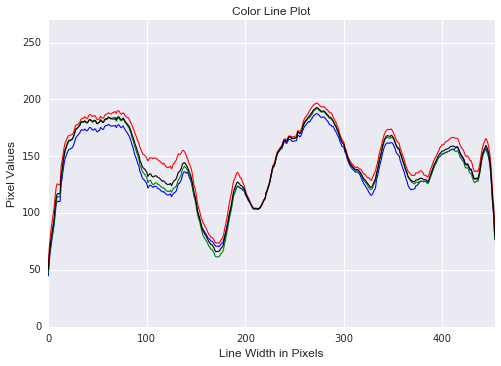

In [6]:
# Plot the line profile of the image
# Optional
import seaborn as sns

df['blue'].plot(color='b',linewidth=1.1)
df['green'].plot(color='g',linewidth=1.1)
df['red'].plot(color='r',linewidth=1.1)
df['gray'].plot(color='black',linewidth=1.1)

# Plot the image along the line profile

axes = plt.gca()
axes.set_ylim([0,270])
plt.title('Color Line Plot')
plt.ylabel('Pixel Values',  fontsize=12)
plt.xlabel('Line Width in Pixels',  fontsize=12)
#plt.imshow(colored,origin='lower',alpha=0.7)
plt.savefig('line.png', bbox_inches='tight',dpi = (300))

In [7]:
# Save output to CSV
df[['pixel','red','green','blue','gray']].to_csv('line_plot.csv', sep=',')